In [1]:
import pandas as pd
import torch
import numpy as np

In [2]:
def load_csv_results(file_paths):
    '''
    csv 파일 로드
    '''
    results = []
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        results.append(df)
    return results

In [10]:
# csv 파일 리스트로 csv 파일 경로 넣어 주면 됩니다! 
csv_files = [
    # "voting_csv/_931.csv", # kfold 5 eva02 large
    # "voting_csv/_930.csv", # 동환님 kfold 5 test3
    # "voting_csv/_929.csv", # 5Fold_layer eva gient
    # "voting_csv/_928.csv", # 5Fold_layer3+PReLU+BatchNorm+MotionBlur
    # "voting_csv/_927.csv", # 1fold Vertical 50%
    # "voting_csv/_926.csv", # fold1_curriculum_best
    "voting_csv/fold1_eva02.csv", # fold1_test
    "voting_csv/test.csv" # test
]

In [11]:
# csv 파일 읽어오기
model_results = load_csv_results(csv_files)

In [12]:
print(model_results[0])

          ID  image_path  target
0          0      0.JPEG     328
1          1      1.JPEG     414
2          2      2.JPEG     493
3          3      3.JPEG      17
4          4      4.JPEG     388
...      ...         ...     ...
10009  10009  10009.JPEG     235
10010  10010  10010.JPEG     191
10011  10011  10011.JPEG     466
10012  10012  10012.JPEG     258
10013  10013  10013.JPEG     210

[10014 rows x 3 columns]


In [13]:
model_results = np.array(model_results)

In [14]:
print(model_results.shape)

(2, 10014, 3)


In [15]:
print(model_results[:, :, 2])

[[328 414 493 ... 466 258 210]
 [328 414 493 ... 466 258 210]]


In [16]:
mr = model_results[:, :, 2]

In [17]:
mr = np.array(mr, dtype=np.float32)  # dtype을 명시적으로 설정하여 float32로 변환

In [18]:
print(mr.shape)

(2, 10014)


In [19]:
# 평균과 표준 편차 계산
mean = np.mean(mr, axis = 0) # 각 10014개의 예측에 대한 6개 모델의 평균
# 모델 간의 예측 차이 계산 (표준 편차)
prediction_diff_std = np.std(mr, axis=0) # 각 10014개의 예측에 대한 6개 모델의 표준편차

In [20]:
# 6개 예측값이 모두 같은 경우 찾기 (즉, 일치하는 부분)
equal_predictions = np.all(mr == mr[0, :], axis=0)  # 6개 모델의 예측이 모두 동일한지 확인

In [21]:
# 만장일치 개수 세기
true_count = np.count_nonzero(equal_predictions)
print(f"만장일치 개수: {true_count}")
print(f"만장일치 퍼센트: {true_count/equal_predictions.size * 100}")
print(f"서로 다른 개수: {equal_predictions.size - true_count}")

만장일치 개수: 10014
만장일치 퍼센트: 100.0
서로 다른 개수: 0


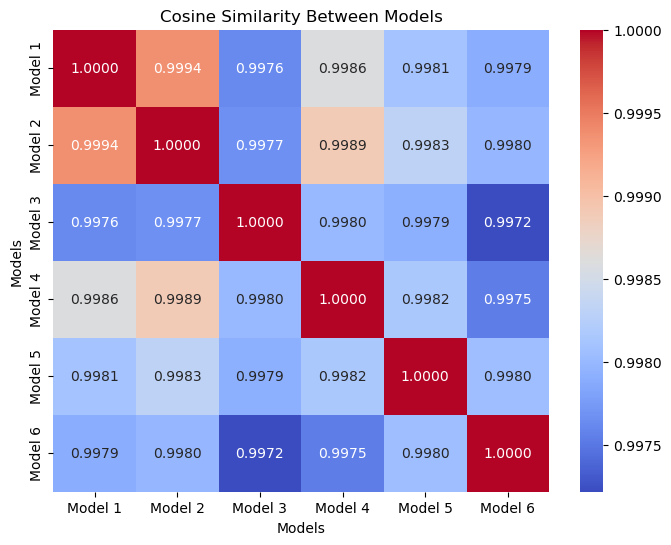

In [187]:
from sklearn.metrics.pairwise import cosine_similarity
# 코사인 유사도 계산
cosine_sim = cosine_similarity(mr)

# 코사인 유사도 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim, annot=True, cmap='coolwarm', fmt=".4f", xticklabels=[f'Model {i+1}' for i in range(6)], yticklabels=[f'Model {i+1}' for i in range(6)])
plt.title('Cosine Similarity Between Models')
plt.xlabel('Models')
plt.ylabel('Models')
plt.show()

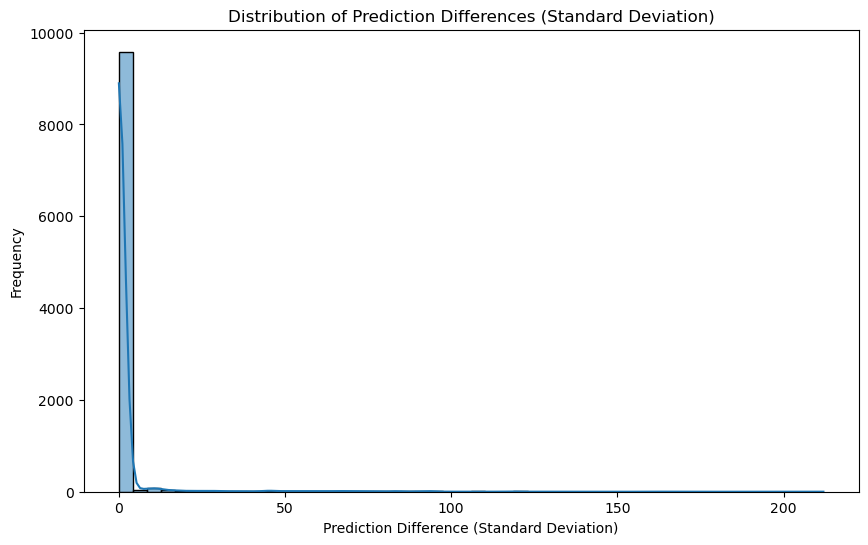

In [60]:
# 결과 시각화
plt.figure(figsize=(10, 6))

# 예측 차이(표준 편차)에 대한 히스토그램 시각화
sns.histplot(prediction_diff_std, kde=True, bins=50)

plt.title("Distribution of Prediction Differences (Standard Deviation)")
plt.xlabel("Prediction Difference (Standard Deviation)")
plt.ylabel("Frequency")
plt.show()

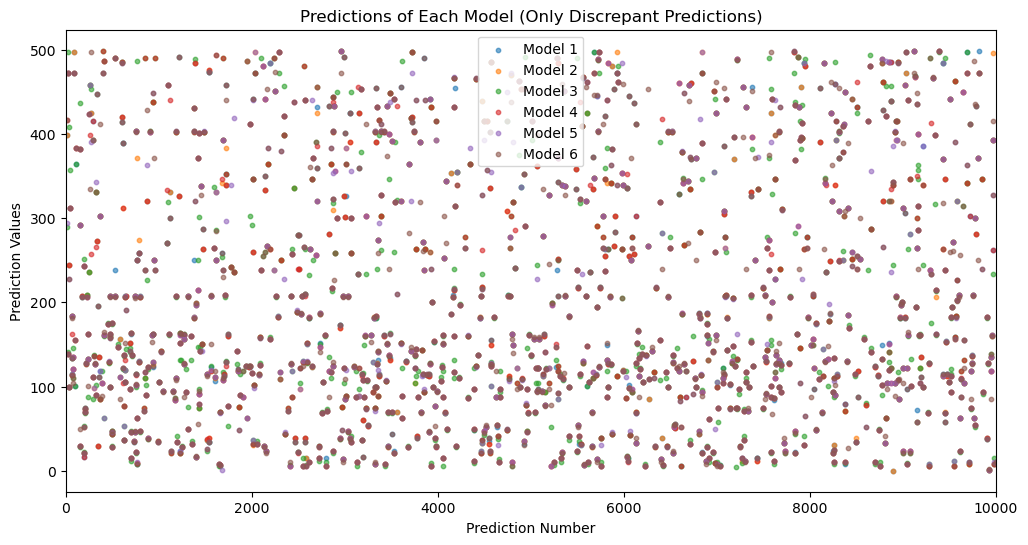

In [61]:
# x축: 예측 번호 (10014개의 값)
x_values = np.arange(10014)

# 6개 예측값이 모두 같은 경우 찾기 (즉, 일치하는 부분)
equal_predictions = np.all(mr == mr[0, :], axis=0)  # 6개 모델의 예측이 모두 동일한지 확인

# 결과 시각화 (scatter plot)
plt.figure(figsize=(12, 6))

# 6개의 모델 각각에 대해 scatter plot, 일치하지 않는 값들만 표시
for i in range(6):
    plt.scatter(x_values[~equal_predictions], mr[i, ~equal_predictions], alpha=0.6, s=10, label=f'Model {i+1}')

# x축 범위를 0부터 10000으로 설정
plt.xlim(0, 10000)

plt.title("Predictions of Each Model (Only Discrepant Predictions)")
plt.xlabel("Prediction Number")
plt.ylabel("Prediction Values")

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


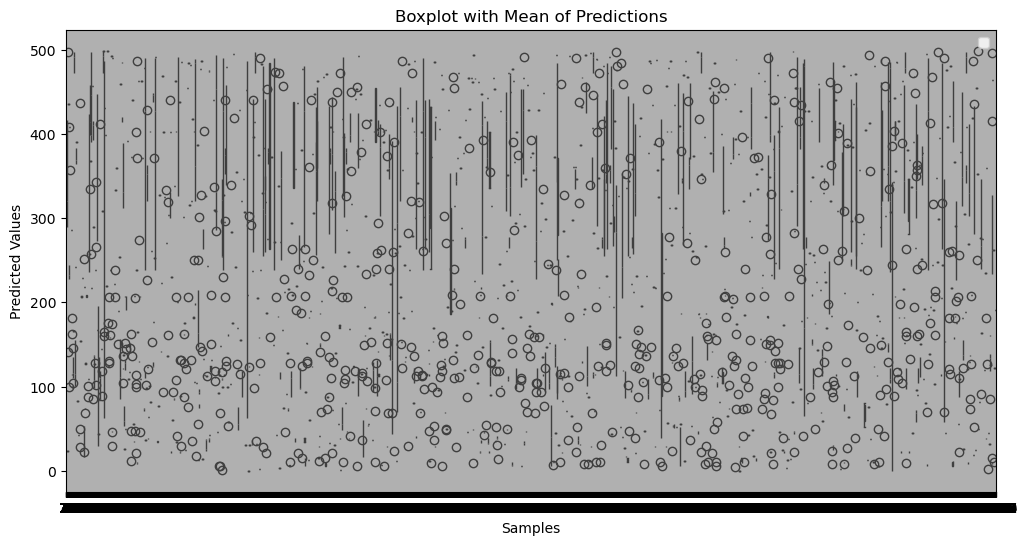

In [76]:
# x축: 예측 번호 (10014개의 값)
x_values = np.arange(10014)

# 6개 예측값이 모두 같은 경우 찾기 (즉, 일치하는 부분)
equal_predictions = np.all(mr == mr[0, :], axis=0)  # 6개 모델의 예측이 모두 동일한지 확인

# 결과 시각화 (scatter plot)
plt.figure(figsize=(12, 6))

# 박스 플롯 생성
sns.boxplot(data=mr, color='lightblue', showfliers=True)

# x축 범위를 0부터 10014으로 설정
plt.xlim(0, 10014)

# 평균 계산 및 시각화
mean_predictions = np.mean(mr, axis=0)
plt.plot(mean_predictions, color='red', linewidth=2, label='Mean', linestyle='--')

# 추가적인 시각적 요소 설정
plt.title('Boxplot with Mean of Predictions')
plt.xlabel('Samples')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()